In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPClassifier
from utils import *

In [2]:
k_clst_wine = 6
k_clst_pima = 2

colors_wine = ['red','green','blue','purple', 'pink', 'yellow']
colors_pima = ['red','green']


INPUT_LAYER = 7
HIDDEN_LAYER1 = 60
HIDDEN_LAYER2 = 60
OUTPUT_LAYER = 1
TRAINING_ITERATIONS = 1150

In [3]:
# pre-processing - Standard scaling on all data 
pima = pd.read_csv('./data/Pima.csv').sample(frac = 1) # shuffle pima
assert pima.isnull().sum().sum() == 0
pima_X, pima_Y = StandardScaler(with_std=False).fit_transform(pima.iloc[:,0:-1]), pima.iloc[:, -1]
pima_Y = pd.Series([1 if label == 2 else 0 for label in pima_Y], name = pima_Y.name) # 0 and 1
m_pima, n_pima = pima_X.shape

##########################################

wine = pd.read_csv('./data/winequality-red.csv',sep =";").sample(frac = 1) # shuffle wine
assert wine.isnull().sum().sum() == 0
wine_X, wine_Y = StandardScaler().fit_transform(wine.iloc[:, 0:-1]), wine.iloc[:, -1]
wine_Y = pd.Series([label - 3 for label in wine_Y], name = wine_Y.name) # range 0 to 6
m_wine, n_wine = wine_X.shape

### 4. Neural Network on reduced Pima

#### Benchmark

In [5]:
clf = MLPClassifier(hidden_layer_sizes=(HIDDEN_LAYER1, HIDDEN_LAYER2), activation='relu',
                   solver = 'lbfgs', random_state = 5)

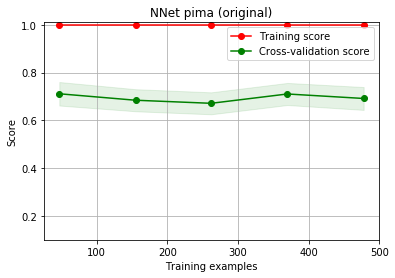

In [6]:
plt, nn_score  = plot_learning_curve(clf, 'NNet pima (original)',
                                          pima_X, pima_Y, ylim=(0.1, 1.01),
                                          cv=cv, n_jobs=4)
plt.savefig('./output/learning-curve-nn.png')
plt.show()

#### PCA

In [8]:
pima_X_pca = pd.DataFrame(PCA(n_components=2).fit_transform(pima_X), columns = ['c1', 'c2'])

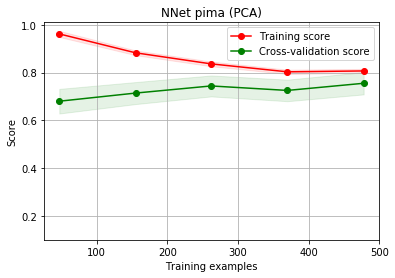

In [35]:
plt, nn_score_pca  = plot_learning_curve(clf, 'NNet pima (PCA)',
                                        pima_X_pca, pima_Y, ylim=(0.1, 1.01),
                                        cv=cv, n_jobs=4)

plt.savefig('./output/learning-curve-nn-pca.png')
plt.show()

#### ICA

In [12]:
pima_X_ica = pd.DataFrame(FastICA(n_components=2,random_state=5, max_iter=1000, tol=1e-2).fit_transform(pima_X), columns = ['c1', 'c2'])

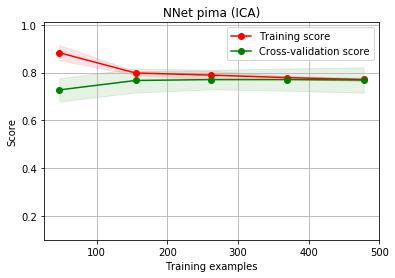

In [36]:
plt, nn_score_ica  = plot_learning_curve(clf, 'NNet pima (ICA)',
                                        pima_X_ica, pima_Y, ylim=(0.1, 1.01),
                                        cv=cv, n_jobs=4)

plt.savefig('./output/learning-curve-nn-ica.png')
plt.show()

#### GRP

In [27]:
pima_X_grp = pd.DataFrame(GaussianRandomProjection(n_components=2,random_state=7).fit_transform(pima_X),
                          columns = ['c1', 'c2'])

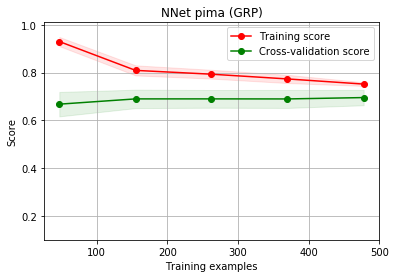

#### FA

In [45]:
pima_X_fa = pd.DataFrame(FactorAnalysis(n_components=2,random_state = 6).fit_transform(pima_X),
                          columns = ['c1', 'c2'])

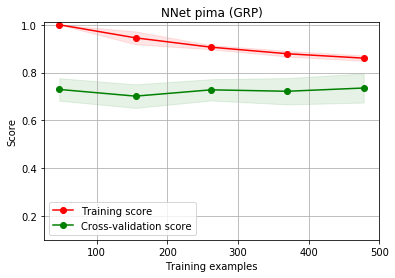

In [46]:
plt, nn_score_fa  = plot_learning_curve(clf, 'NNet pima (GRP)',
                                        pima_X_fa, pima_Y, ylim=(0.1, 1.01),
                                        cv=cv, n_jobs=4)

plt.savefig('./output/learning-curve-nn-fa.png')
plt.show()

#### Scores comparisons

In [51]:

scores = pd.concat((
    pd.DataFrame([nn_score], columns=['benchmark'], index =['test score']),
    pd.DataFrame([nn_score_pca], columns=['pca'], index =['test score']),
    pd.DataFrame([nn_score_ica], columns=['ica'], index =['test score']),
    pd.DataFrame([nn_score_grp], columns=['grp'], index =['test score']),
    pd.DataFrame([nn_score_fa], columns=['fa'], index =['test score']),
), axis = 1)
scores.sort_values(by='test score', axis = 1, inplace =True)
scores

,grp,benchmark,fa,pca,ica
test score,0.695249,0.711131,0.73524,0.755074,0.770494
